In [3]:
# Initial settings

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import loading
import creating_table
import analyzing
import modeling
import validating

# URLs with correct format: raw from GitHub
url_energy = "https://raw.githubusercontent.com/owid/energy-data/master/owid-energy-data.csv"
url_country = "https://raw.githubusercontent.com/lukes/ISO-3166-Countries-with-Regional-Codes/master/all/all.csv"

energy = loading.load_data(url_energy)
country = loading.load_data(url_country)

main_df = creating_table.main_table(energy_df = energy, country_df = country)

Introduction

Energy is seen as a key driver of wealth creation and an important component of economic growth. Everyone agrees that energy plays a crucial role in economic growth, and historical evidence shows that there is a direct correlation between energy availability and economic activity1. Global energy consumption and demand have been increasing steadily over the past few decades. The need for commercial services, such as hospitals, schools, office buildings, and retail malls, as well as for household appliances and electronic gadgets, is growing as living standards rise1. As seen, alongside the growth of industry and population, electricity consumption has been rising daily. Because of this circumstance, scholars are now looking at the connection between energy and the economy1. The form of the relationship has been empirically tested by studies using different approaches, with some studies focusing on the analysis of a single nation and others looking at groups of nations.

On the other hand, the economic literature has extensively studied also the relationship between environmental impacts and economic growth. There is some debate about the nature of the relationship between GDP per capita and greenhouse gas emissions in the context of climate change. As found in the literature, on average, there is still a positive correlation between GDP per capita and CO2 emissions per capita2. Nonetheless, there is a global trend toward this link becoming weaker. However, worldwide decoupling of economic growth and CO2 has not yet been accomplished2. One mechanism for diminishing the CO2 emissions is by transitioning the energy generation to renewals or low-carbon intensity sources. This rationale adheres to the concept of sustainable development, which guarantees that resource preservation and energy substitution will not result in a decline in per capita net national wealth. Indeed, economic development can progress if it can be guaranteed that the ecosystem will continue to function in a sustainable manner3.

This study aims to examinate the relationship between GDP per capita and electricity generation by type of source: fossil fuels and low-carbon sources, across a comprehensive set of 164 countries over different time periods, with a focus on the 2000–2022 period. The countries included in the sample accounted for 91.2% of the total world population in 2021, representing 7,224 million people, with some countries discarded from the sample due to data limitations.

In [ ]:
total_countries = len(main_df["country"].unique())


164

In [3]:
main_df


,country,iso_code,year,population,gdp,carbon_intensity_elec,electricity_demand,fossil_elec,greenhouse_gas_emissions,lowcarbon_elec,...,per_capita_electricity,renewables_elec_per_capita,gdp_per_capita,greenhouse_gas_emissions_per_capita,electricity_demand_per_capita,log_gdp_per_capita,log_lowcarbon_elec,log_fossil_elec,region,sub-region
0,Afghanistan,AFG,2000,19542986.0,1.128379e+10,250.000,0.57,8.699,0.12,15.862,...,24.561,15.862,577.383309,0.006140,2.916647e-08,6.358506,2.825063,2.272023,Asia,Southern Asia
1,Afghanistan,AFG,2001,19688634.0,1.102127e+10,217.391,0.78,9.650,0.15,25.395,...,35.046,25.395,559.778453,0.007619,3.961677e-08,6.327541,3.273175,2.365560,Asia,Southern Asia
2,Afghanistan,AFG,2002,21000258.0,1.880487e+10,169.014,0.81,7.143,0.12,26.666,...,33.809,26.666,895.459054,0.005714,3.857095e-08,6.797336,3.320204,2.097159,Asia,Southern Asia
3,Afghanistan,AFG,2003,22645136.0,2.107434e+10,241.758,1.01,12.365,0.22,27.821,...,40.185,27.821,930.634461,0.009715,4.460119e-08,6.835867,3.361104,2.592639,Asia,Southern Asia
4,Afghanistan,AFG,2004,23553554.0,2.233257e+10,227.848,0.89,9.765,0.18,23.776,...,33.541,23.776,948.161352,0.007642,3.778623e-08,6.854525,3.209875,2.376300,Asia,Southern Asia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3643,Zimbabwe,ZWE,2018,15052191.0,2.678627e+10,395.127,10.46,277.700,3.73,349.451,...,627.151,349.451,1779.559752,0.247804,6.949154e-07,7.484121,5.859221,5.630136,Africa,Sub-Saharan Africa
3644,Zimbabwe,ZWE,2019,15354606.0,2.514642e+10,428.740,9.60,267.021,3.64,285.908,...,552.929,285.908,1637.711652,0.237062,6.252196e-07,7.401055,5.659162,5.591065,Africa,Sub-Saharan Africa
3645,Zimbabwe,ZWE,2020,15669663.0,2.317871e+10,371.088,8.69,177.413,2.49,250.803,...,428.216,250.803,1479.209026,0.158906,5.545748e-07,7.299263,5.528647,5.184101,Africa,Sub-Saharan Africa
3646,Zimbabwe,ZWE,2021,15993525.0,2.514009e+10,270.686,10.20,156.939,2.29,372.026,...,528.964,372.026,1571.891677,0.143183,6.377581e-07,7.360035,5.921648,5.062209,Africa,Sub-Saharan Africa


In [4]:
describe_table = analyzing.describe(main_df)
describe_table

/Users/laurab_g/Documents/PSE_PYTHON_FINAL PROJECT/PYTHON_FINAL_PROJECT/PYTHON_FINAL_PROJECT/analyzing.py:35: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  descriptive_table = pd.concat([descriptive_table, new_data], ignore_index=True)


,Variable,Unit,Min,Max,Mean,Median,SD
0,gdp_per_capita,USD - 2011 prices,438.61,164146.40,16622.62,10364.42,18071.49
1,fossil_elec,kilowatt-hours per person,0.08,24133.34,2274.94,1092.88,3322.34
2,lowcarbon_elec,kilowatt-hours per person,0.00,31641.85,1341.40,247.04,3122.88


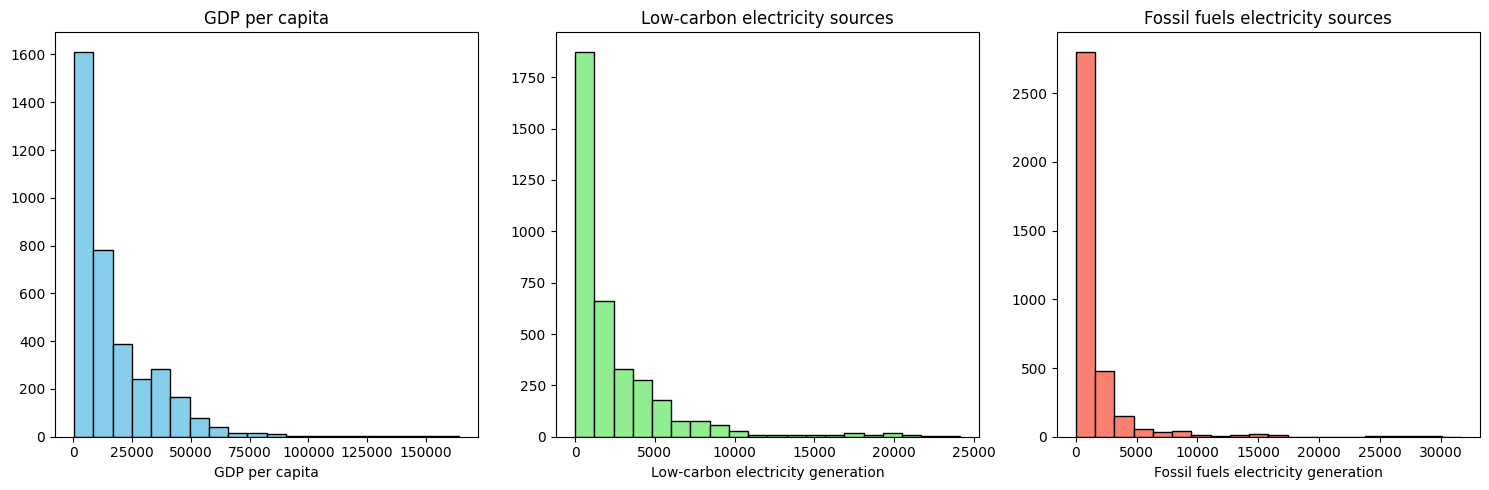

In [5]:
analyzing.plot_histograms(main_df)

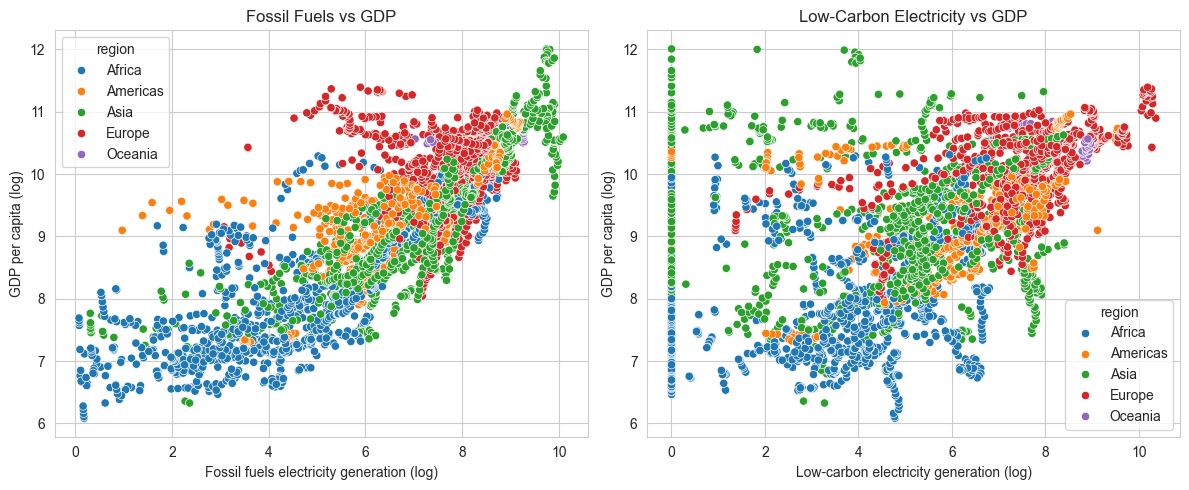

In [6]:
analyzing.plot_scatterplots(main_df)

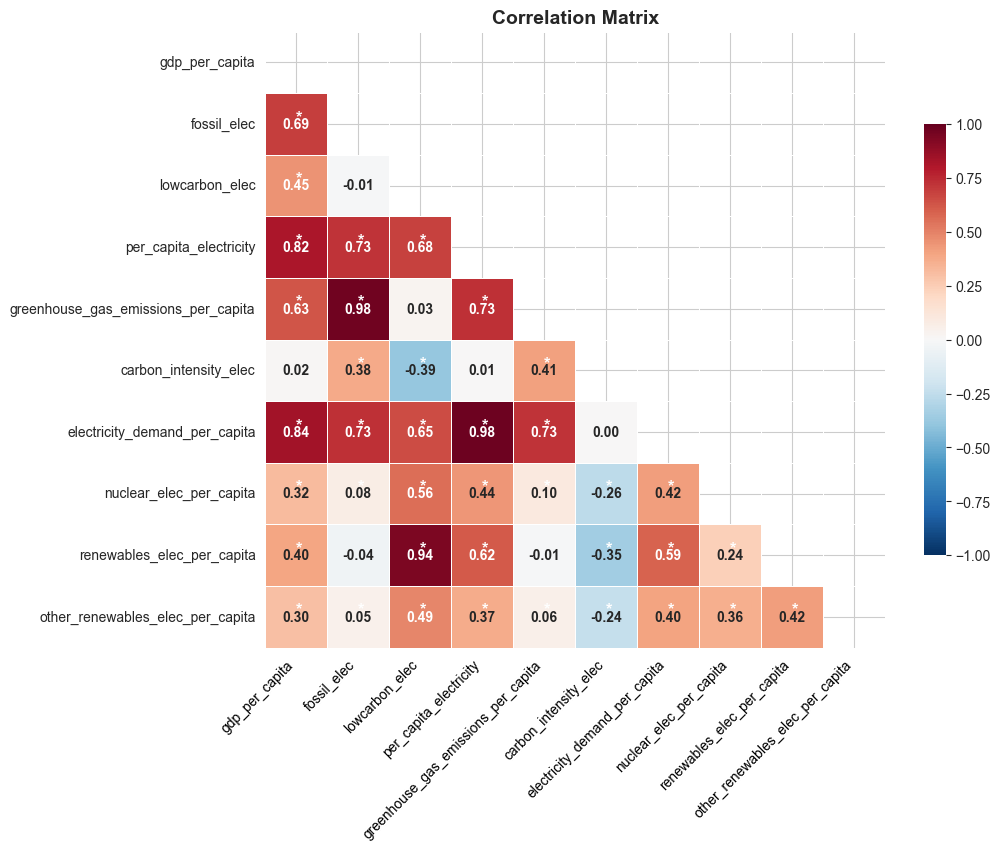

In [7]:
analyzing.correlation_matrix(main_df)

In [8]:
modeling.regression_models(main_df)


/Users/laurab_g/Documents/PSE_PYTHON_FINAL PROJECT/PYTHON_FINAL_PROJECT/PYTHON_FINAL_PROJECT/sia_master/lib/python3.9/site-packages/linearmodels/panel/data.py:680: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mu = self._frame.groupby(level=level).mean()
/Users/laurab_g/Documents/PSE_PYTHON_FINAL PROJECT/PYTHON_FINAL_PROJECT/PYTHON_FINAL_PROJECT/sia_master/lib/python3.9/site-packages/linearmodels/panel/data.py:680: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mu = self._frame.groupby(level=level).mean()
/Users/laurab_g/Documents/PSE_PYTHON_FINAL PROJECT/PYTHON_FINAL_PROJECT/PYTHON_FINAL_PROJECT/sia_master/li


Regression Results - Pooled vs Fixed Effects models
                               Pooled OLS             FE Country  \
log_lowcarbon_elec  0.3745 (0.0104) [***]  0.0854 (0.0043) [***]   
log_fossil_elec     1.0462 (0.0089) [***]  0.1392 (0.0073) [***]   

                                  FE Year  
log_lowcarbon_elec   0.1222 (0.004) [***]  
log_fossil_elec     0.4313 (0.0049) [***]  


/Users/laurab_g/Documents/PSE_PYTHON_FINAL PROJECT/PYTHON_FINAL_PROJECT/PYTHON_FINAL_PROJECT/sia_master/lib/python3.9/site-packages/linearmodels/panel/data.py:680: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mu = self._frame.groupby(level=level).mean()
/Users/laurab_g/Documents/PSE_PYTHON_FINAL PROJECT/PYTHON_FINAL_PROJECT/PYTHON_FINAL_PROJECT/sia_master/lib/python3.9/site-packages/linearmodels/panel/data.py:680: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mu = self._frame.groupby(level=level).mean()
/Users/laurab_g/Documents/PSE_PYTHON_FINAL PROJECT/PYTHON_FINAL_PROJECT/PYTHON_FINAL_PROJECT/sia_master/li

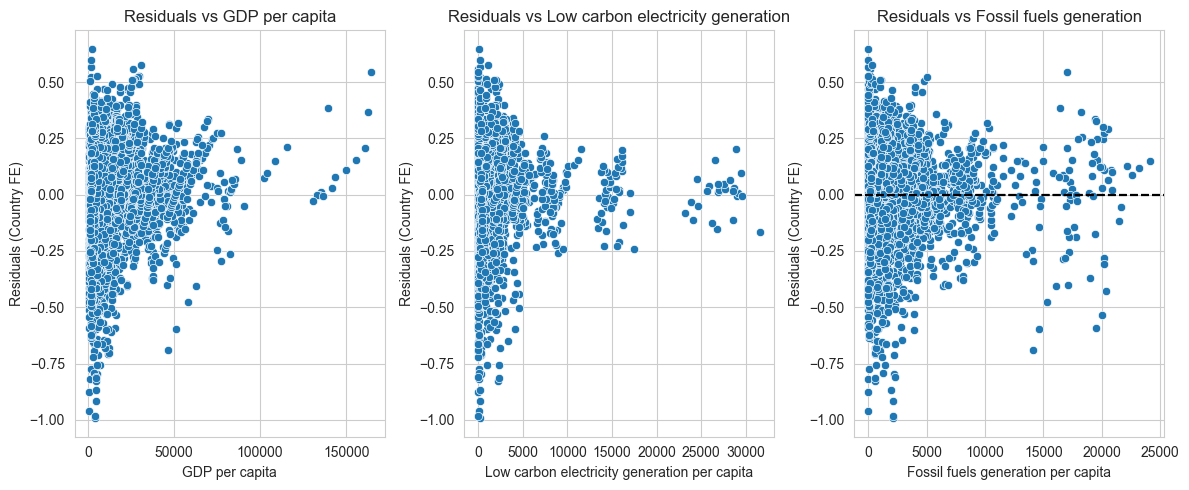

In [9]:
validating.residuals(main_df)